In [1]:
import os
import subprocess
import matplotlib.pyplot as plt
import cv2

<IPython.core.display.Javascript object>


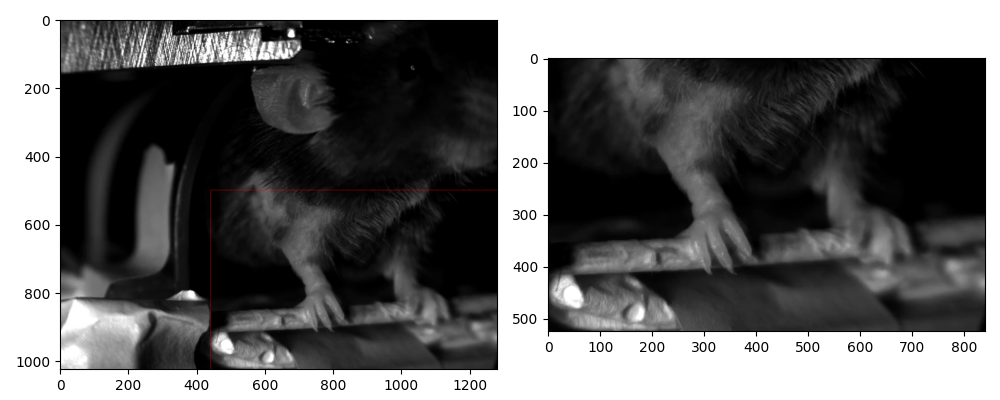

In [5]:
ffmpeg_dir = "C:/Users/mpanze/Documents/ffmpeg/bin/"
file_to_crop = "W:/Neurophysiology-Storage1/Wahl/Matteo/mouse_data/Batch_3/M20/2021-10-27/M020_2021-10-27_1_slave.avi"
w,h,x,y = (1280-440,1024-500,440,500) # width, height, x, y
%matplotlib notebook
cap = cv2.VideoCapture(file_to_crop)
ret,frame= cap.read()
cap.release()
plt.figure(figsize = (10,4))
plt.subplot(122)
plt.imshow(frame[y:y+h, x:x+w], "Greys_r")
plt.subplot(121)
cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0))
plt.imshow(frame)
plt.tight_layout()

In [10]:
os.chdir(ffmpeg_dir)
#subprocess.run(['ffplay', '-i', file_to_crop, '-vf', "crop=w=%i:h=%i:x=%i:y=%i" % (w,h,x,y)])
subprocess.run(['ffplay', '-i', file_to_crop, '-vf', "crop=w=%i:h=%i:x=%i:y=%i, scale=iw/2:ih/2" % (w,h,x,y)])

CompletedProcess(args=['ffplay', '-i', 'W:/Neurophysiology-Storage1/Wahl/Matteo/mouse_data/Batch_3/M20/2021-10-27/M020_2021-10-27_1_slave.avi', '-vf', 'crop=w=840:h=524:x=440:y=500, scale=iw/2:ih/2'], returncode=0)

In [11]:
file_out = file_to_crop[:-4] + "_cropped_scaled2.avi"

#ffmpeg_command = [
#    'ffmpeg',
#    '-i', file_to_crop,
#    '-c:v', 'libx264',
#    '-preset', 'veryfast',
#    '-vf', 'crop=w=%i:h=%i:x=%i:y=%i' % (w,h,x,y),
#    '-c:a', 'copy', file_out
#]

ffmpeg_command = [
    'ffmpeg',
    '-i', file_to_crop,
    '-c:v', 'libx264',
    '-preset', 'veryfast',
    '-vf', 'crop=w=%i:h=%i:x=%i:y=%i, scale=iw/2:ih/2' % (w,h,x,y),
    '-c:a', 'copy', file_out
]

os.chdir(ffmpeg_dir)
print(" ".join(ffmpeg_command))
subprocess.run(ffmpeg_command)

ffmpeg -i W:/Neurophysiology-Storage1/Wahl/Matteo/mouse_data/Batch_3/M20/2021-10-27/M020_2021-10-27_1_slave.avi -c:v libx264 -preset veryfast -vf crop=w=840:h=524:x=440:y=500, scale=iw/2:ih/2 -c:a copy W:/Neurophysiology-Storage1/Wahl/Matteo/mouse_data/Batch_3/M20/2021-10-27/M020_2021-10-27_1_slave_cropped_scaled2.avi


CompletedProcess(args=['ffmpeg', '-i', 'W:/Neurophysiology-Storage1/Wahl/Matteo/mouse_data/Batch_3/M20/2021-10-27/M020_2021-10-27_1_slave.avi', '-c:v', 'libx264', '-preset', 'veryfast', '-vf', 'crop=w=840:h=524:x=440:y=500, scale=iw/2:ih/2', '-c:a', 'copy', 'W:/Neurophysiology-Storage1/Wahl/Matteo/mouse_data/Batch_3/M20/2021-10-27/M020_2021-10-27_1_slave_cropped_scaled2.avi'], returncode=0)